In [1]:
from plot import *

<Figure size 3200x2240 with 0 Axes>

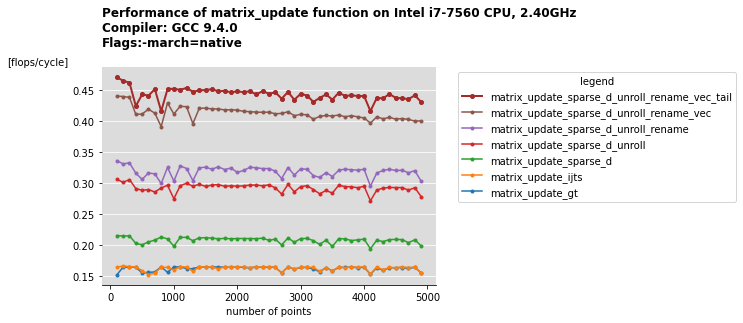

In [3]:
plot_step_performances("../output/matrix_update.txt", "matrix_update")